<a href="https://colab.research.google.com/github/KenzieLeonic/New_York_Airbnb_OpenData_Starter/blob/main/new_york_project_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Dictionary (data detail EN to TH)

Sources =  https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data 


number of columns | columns name
0. id : id เป็นตัวแปรประเภท ตัวเลข
1. name : ชื่อบ้านเช้า เป็นตัวแปรประเภท string
2. host_id : หลายเลขเจ้าของบ้าน ตัวแปรประเภท string
3. host_name : ชื่อเจ้าของบ้าน เป็นตัวแปรประเภท string
4. neighbourhood_group : เขตการปกครองท้องถิ่นใน New York เป็นตัวแปรประเภท string 
- Manhattan = แมนแฮตตัน
- Brooklyn = บรุกลิน
- Queens = ควีน
- Bronx = บร็องซ์ 
- Staten Island = เกาะสแตเทน  

5. neighbourhood : พื้นที่ใกล้กับที่พัก เป็นตัวแปรประเภท string 
6. latitude : พิกัดละติจูด เป็นตัวแปรประเภททศนิยม
7. longitude : พิกัดลองจิจูด เป็นตัวแปรประเภททศนิยม
8. room_type : ประเภทห้องพัก เป็นตัวแปรประเภท string
- Entire home/apt = บ้านหรืออพาร์ตเมนต์  
- Private room = ห้องส่วนตัว
- Shared room = ห้องแชร์ 
9. price : ราคาที่พัก เป็นตัวแปรประเภท float 
10. minimum_nights: คืนที่นอนค้างน้อยที่สุด เป็นตัวแปรประเภทตัวเลข
11. number_of_reviews : จำนวนคนที่มารีวิว เป็นตัวแปรประเภทตัวเลข
12. last_review : วันที่ลูกค้าเขียนรีวิวล่าสุด เป็นตัวแปรประเภทวันที่ 
13. reviews_per_month: จำนวนคนที่มารีวิวต่อเดือน เป็นตัวแปรประเภททศนิยม
14. calculated_host_listings_count : จำนวนรายการต่อเจ้าของบ้าน เป็นตัวแปรประเภทตัวเลข 
15. availability_365 : จำนวนวันที่ทำการเปิดจองที่พัก เป็นตัวแปรประเภทตัวเลข

## Open file 'AB_NYC_2019.csv'

In [ ]:
nyc_booking_df = pd.read_csv('AB_NYC_2019.csv')
nyc_booking_df

In [ ]:
nyc_booking_df.columns

## Change Variable Type 
for changing variable

In [ ]:
nyc_booking_df['neighbourhood_group']= nyc_booking_df['neighbourhood_group'].astype("category")
nyc_booking_df['room_type'] = nyc_booking_df['room_type'].astype("category")
nyc_booking_df['last_review'] = pd.to_datetime(nyc_booking_df['last_review'],format = '%Y-%m-%d')

## Checking data in dataset

In [ ]:
#check that there has NaN in this dataset
nyc_booking_df.isna().sum() # count NaN

In [ ]:
nyc_booking_df.value_counts('id')

In [ ]:
nyc_booking_df.value_counts('name').sort_index()

In [ ]:
nyc_booking_df.value_counts('host_id')

In [ ]:
nyc_booking_df.value_counts('host_name')

In [ ]:
nyc_booking_df.value_counts('neighbourhood_group')

In [ ]:
nyc_booking_df.value_counts('neighbourhood')

In [ ]:
nyc_booking_df.value_counts('latitude')

In [ ]:
nyc_booking_df.value_counts('longitude')

In [ ]:
nyc_booking_df.value_counts('room_type')

In [ ]:
nyc_booking_df.value_counts('price')

In [ ]:
nyc_booking_df.value_counts('minimum_nights')

In [ ]:
nyc_booking_df.value_counts('number_of_reviews')

In [ ]:
nyc_booking_df.value_counts('last_review')

In [ ]:
nyc_booking_df.value_counts('reviews_per_month')

In [ ]:
nyc_booking_df.value_counts('calculated_host_listings_count')
nyc_booking_df['calculated_host_listings_count'].max(),nyc_booking_df['calculated_host_listings_count'].mean()

In [ ]:
nyc_booking_df.value_counts('availability_365')

In [ ]:
nyc_booking_df.groupby('room_type')['price'].agg(['mean','min','max'])

## Cleaning Data

drop  minimum night above 365

In [ ]:
nyc_booking_df.info()

In [ ]:
nyc_booking_df = nyc_booking_df[nyc_booking_df['minimum_nights'] <= 365]
nyc_booking_df['reviews_per_month'] = nyc_booking_df['reviews_per_month'].fillna(value = 0)
nyc_booking_df

## Basic Analysis


### Checked the mean of rooms' price by neighbourhood_group and room_type
ตรวจสอบค่าเฉลี่ย ของค่าที่พัก ของแต่ละแวกบ้าน

In [ ]:
nyc_price_mean = nyc_booking_df.pivot_table(index = 'neighbourhood_group' , columns = 'room_type' , values = 'price' , aggfunc = np.mean)
nyc_price_mean

### Compare the adverage , hightest and lowest rooms' price 
เปรียบเทียบค่าเฉลี่ย ค่าสูงสุด และค่าต่ำสุดของ ราคาของห้องพัก

compare the room _types' in the mean price 

In [ ]:
nyc_max_price_room_mean = nyc_booking_df.groupby(['room_type']).price.mean() 
nyc_max_price_room_mean = nyc_max_price_room_mean.to_frame('price').reset_index()
nyc_max_price_room_mean['class'] = 'Mean'
nyc_max_price_room_mean

compare the room _types' in the max price 

In [ ]:
nyc_max_price_room_max = nyc_booking_df.groupby(['room_type']).price.max()
nyc_max_price_room_max = nyc_max_price_room_max.to_frame('price').reset_index()
nyc_max_price_room_max['class'] = 'Max'
nyc_max_price_room_max

compare the room_types' in the min prices

In [ ]:
nyc_max_price_room_min = nyc_booking_df.groupby(['room_type']).price.min()
nyc_max_price_room_min = nyc_max_price_room_min.to_frame('price').reset_index()
nyc_max_price_room_min['class'] = 'Min'
nyc_max_price_room_min

merge each 3 data 

In [ ]:
new_price_type = pd.concat([nyc_max_price_room_mean,nyc_max_price_room_max,nyc_max_price_room_min],axis = 0)
new_price_type

In [ ]:
sns.catplot(y = "price", x= "room_type", data=nyc_max_price_room_max, kind="bar")

In [ ]:
sns.catplot(y= "price", x = "room_type", data=nyc_max_price_room_mean, kind="bar")

### Data Analysis 

Compare the room's price by using neighbourhood_group, room_type, minimum_night, number_of_reviews



<Figure size 1080x432 with 0 Axes>

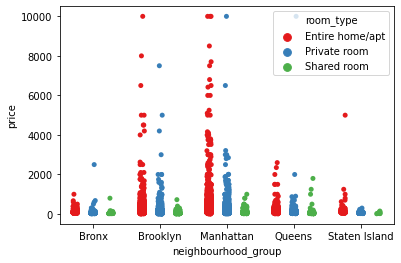

<Figure size 1080x432 with 0 Axes>

In [189]:
sns.stripplot(x="neighbourhood_group", y="price",hue = 'room_type', data=nyc_booking_df,palette='Set1',dodge = True)
plt.figure(figsize=(15,6))

Compare the room's mean price by pivot the neighbourhood_group and room_type


In [ ]:
price_mean_group = nyc_booking_df.pivot_table(index = 'neighbourhood_group', values= 'price', columns = 'room_type', aggfunc = 'mean')
price_mean_group 

In [ ]:
sns.heatmap(price_mean_group , cmap='YlOrBr', annot=True,fmt = '.2f')

longtitude vs latitude group with neighbourhood_group

In [ ]:
g = sns.jointplot(x = 'longitude', y ='latitude' , data = nyc_booking_df,hue = 'neighbourhood_group',kind='scatter')
plt.figure(figsize=(15,7))

In [ ]:
nyc_booking_df.columns

## Deep Analysis

#### Hypothesis

##### Does the room's availability effect to room's price?  (Use bootstrap tecinque)

In [ ]:
import statsmodels.api as sm

In [ ]:

select_df = nyc_booking_df.copy()
select_df['Room_Status'] = 0  # before half year
select_df.loc[(select_df['availability_365'] >= 183 ),'Room_Status'] = 1 # after half year

In [ ]:
#Create new row to compare the room's price
select_df['compare_price'] = 'Low Price'
select_df.loc[(select_df['price'] > 50), 'compare_price'] = 'High Price'

In [ ]:
sns.countplot(x = 'compare_price', data = select_df)

In [ ]:
#check the number of room status
count_status = select_df.groupby('Room_Status').size()
#get h0
a = count_status.get(1)
gA = select_df.sample(a)['compare_price']
gA

In [ ]:
gB = select_df.drop(gA.index)['compare_price']
gB

In [ ]:
gA.value_counts()

In [ ]:
gB.value_counts()

In [ ]:
x = (gA.value_counts().get(0)/gA.size) / (gB.value_counts().get(0) / gB.size)
x

In [ ]:
#resample 1000 times 
res = []
for x in range(1000):
    gA = select_df.sample(a)['price']
    gB = select_df.drop(gA.index)['price']
    res.append((gA.sum() / gA.size) / (gB.sum() / gB.size))
resample_diff = pd.Series(res)

In [ ]:
resample_diff

plot the score to understand this visually

In [ ]:
plt.hist(resample_diff)

find the confident interval
p-value and compare with alpha = 0.5



In [ ]:
sum(resample_diff >= x)

In [ ]:
alpha = 0.05
p_value = sum(resample_diff >= x) / len(resample_diff)
print('pvalue : {}'.format(p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

In [ ]:
#using library for bootstrap
from sklearn.utils import resample
select_2 = select_df.loc[:,['Room_Status','compare_price']]


##### Does the price affect the number of reviews

In [ ]:
low_price = nyc_booking_df[nyc_booking_df['price'] <  np.median(nyc_booking_df['price'])]
high_price = nyc_booking_df[nyc_booking_df['price'] >=  np.median(nyc_booking_df['price'])]

In [ ]:
alpha = 0.05
tstat,p_value = stats.ttest_ind(low_price['number_of_reviews'],high_price['number_of_reviews'], equal_var=True)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

### Machiene Learning
X (input) = 'number_of_reviews','reviews_per_month','price','calculated_host_listings_count','latitude', 'longitude'


y = (output) = 'price'

##### Find a test cases

In [ ]:
nyc_booking_df.columns

In [ ]:
from sklearn.model_selection import train_test_split
select2 = nyc_booking_df.copy()
X = select2[['number_of_reviews','reviews_per_month','price','calculated_host_listings_count','latitude', 'longitude']]
y = select2.availability_365

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test.head()
y_train.head()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train.head(10)

##### K NeighborsClassifier

In [ ]:
#แบ่งใน sklearn ใน neibor import จาก KNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
#k = 9
knn = KNeighborsClassifier(n_neighbors=9) 
knn.fit(X_train,y_train) 

In [ ]:
knn.predict(X_test)

Find the accuracy score

In [ ]:
knn.score(X_test,y_test)
print('Accuracy score = {}'.format(knn.score(X_test,y_test)))

##### K-Fold Cross-validation

In [ ]:
# K-Fold Cross-validation
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_f = KNeighborsClassifier(n_neighbors= 9) # classifier (no fit)
score = cross_val_score(knn_f, X, y, cv = cv) # cv = k (amount of test cases)

print("Accuracy score :")
print("mean = {} , std = {}".format(np.mean(score), np.std(score)))

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

Model Evaluation 

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
sns.displot((y_test-predictions),bins=30);

##### Regression Evaluation Metrics

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))